In [10]:
import sys
print('python:{}'.format(sys.version))
import numpy
print('numpy:{}'.format(numpy.__version__))
import scipy
print('scipy:{}'.format(scipy.__version__))
import matplotlib
print('matplotlib:{}'.format(matplotlib.__version__))
import pandas
print('pandas:{}'.format(pandas.__version__))
import sklearn
print('sklearn:{}'.format(sklearn.__version__))


python:3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
numpy:1.24.3
scipy:1.10.1
matplotlib:3.7.1
pandas:1.5.3
sklearn:1.3.0


In [11]:
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn .metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [17]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-database/iris/iris.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names=["sepal-lngth",'sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)


In [35]:
print(dataset.shape)
print(dataset.tail(50))


(150, 5)
     sepal-lngth  sepal-width  petal-length  petal-width           class
100          6.3          3.3           6.0          2.5  Iris-virginica
101          5.8          2.7           5.1          1.9  Iris-virginica
102          7.1          3.0           5.9          2.1  Iris-virginica
103          6.3          2.9           5.6          1.8  Iris-virginica
104          6.5          3.0           5.8          2.2  Iris-virginica
105          7.6          3.0           6.6          2.1  Iris-virginica
106          4.9          2.5           4.5          1.7  Iris-virginica
107          7.3          2.9           6.3          1.8  Iris-virginica
108          6.7          2.5           5.8          1.8  Iris-virginica
109          7.2          3.6           6.1          2.5  Iris-virginica
110          6.5          3.2           5.1          2.0  Iris-virginica
111          6.4          2.7           5.3          1.9  Iris-virginica
112          6.8          3.0           5.

In [21]:
print(dataset.describe())

       sepal-lngth  sepal-width  petal-length  petal-width
count   150.000000   150.000000    150.000000   150.000000
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161
min       4.300000     2.000000      1.000000     0.100000
25%       5.100000     2.800000      1.600000     0.300000
50%       5.800000     3.000000      4.350000     1.300000
75%       6.400000     3.300000      5.100000     1.800000
max       7.900000     4.400000      6.900000     2.500000


In [24]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


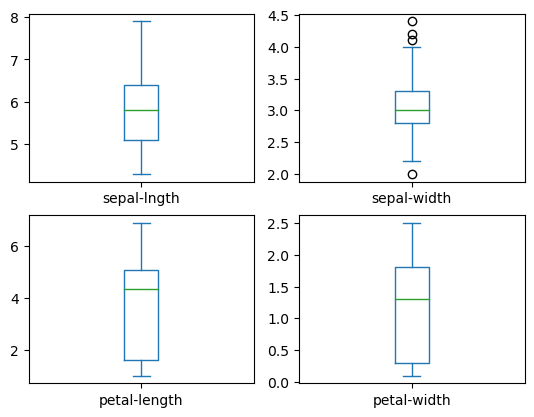

In [26]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()
# we are plottting the box plot and the layout is 2x2 so two graphs in one row and we dont want to share the coordinates of x and y for all graphs so sharex and shgarey are false


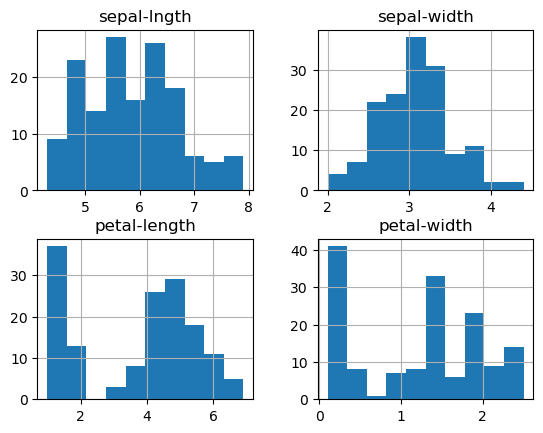

In [28]:
dataset.hist()
# shows the historgram
plt.show()

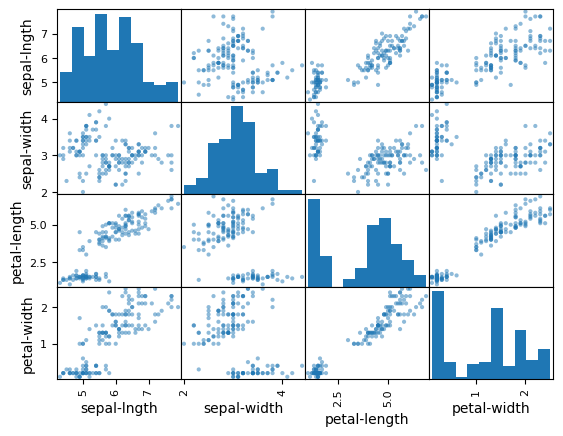

In [30]:
scatter_matrix(dataset)
plt.show()

In [40]:
# split the data into two partys training and validation 80% training and 20% validation
array= dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.2
seed=6
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [ ]:
seed=6
scoring ='accuracy'


In [45]:
# spot check the algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# evaluate each model in turn
result=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f {%f}" % {name,cv_results.mean(),cv_results.std()}
    print(msg)
fig =plt.figure()
fig.subtitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xtickets()
                          
                          
                          












ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.